# 📘 Mobile Price Range Prediction with ML

## 📥 1. Import Libraries

In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from imblearn.pipeline import Pipeline      
from imblearn.over_sampling import SMOTE



from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_recall_fscore_support as score , classification_report , confusion_matrix,ConfusionMatrixDisplay






## 📊 2. Load and Explore Data

In [11]:
data =pd.read_csv('train.csv')

In [12]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
data.shape

(2000, 21)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 📈 3. Exploratory Data Analysis (EDA)

In [17]:
data['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

## 📤 4. Data Preparation

<Axes: >

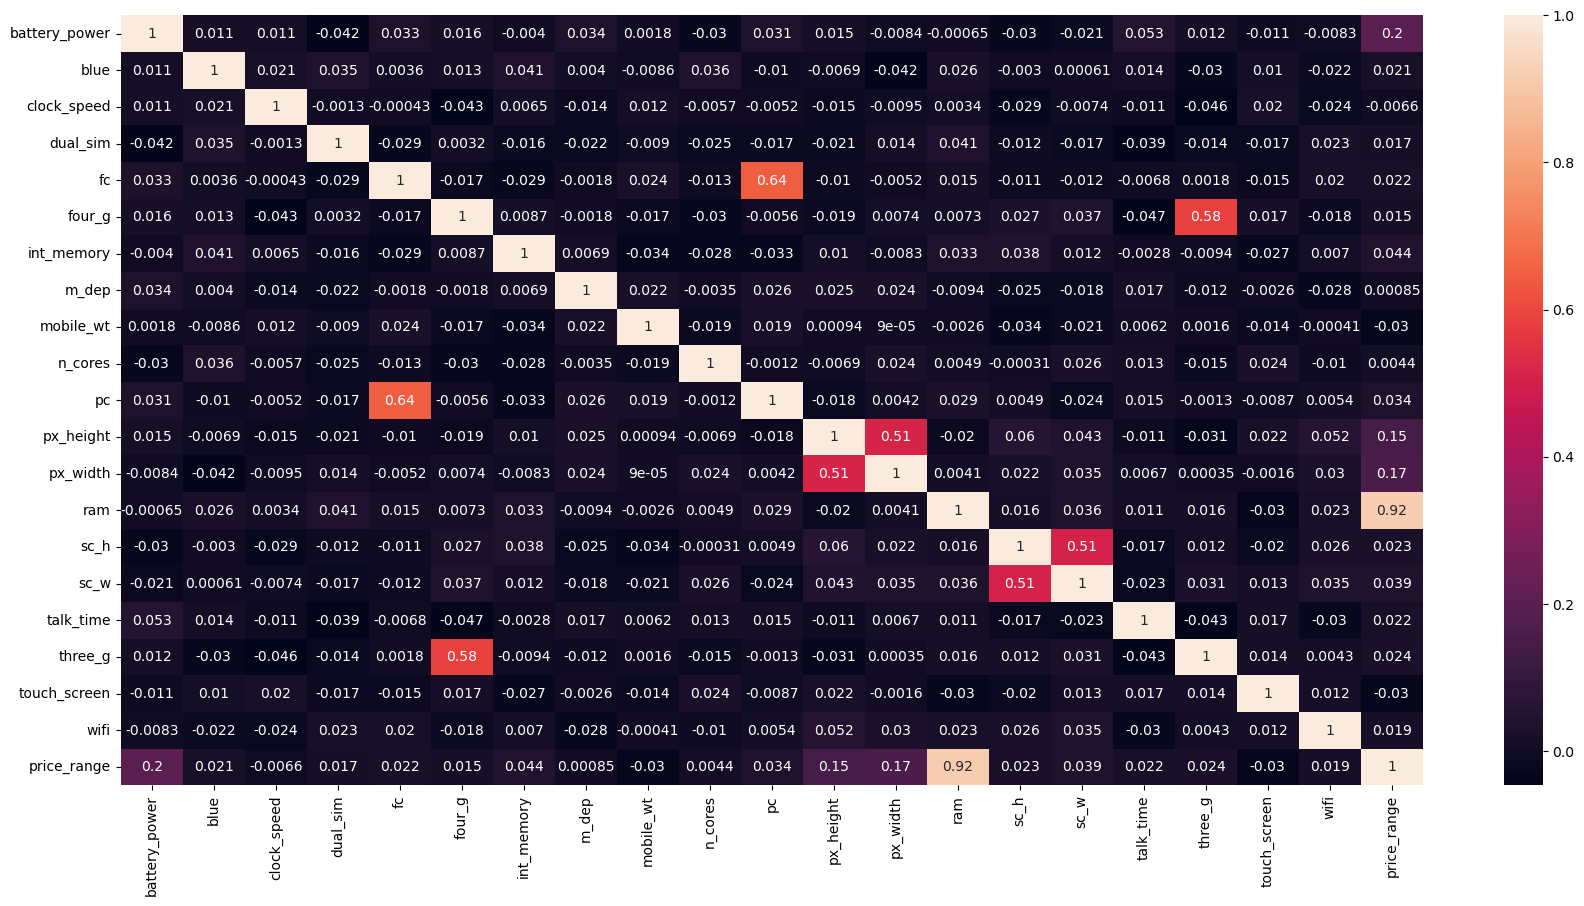

In [20]:
plt.figure(figsize=(21,10))
sns.heatmap(data=data.corr(),annot=True)

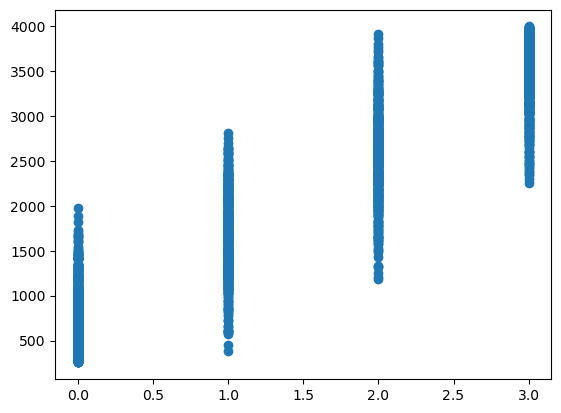

In [21]:
plt.scatter(data['price_range'],data['ram'])


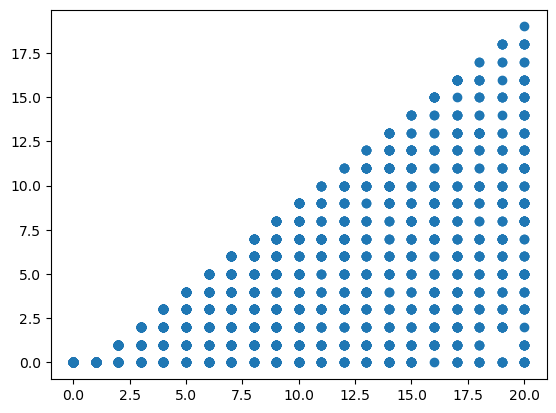

In [22]:
plt.scatter(data['pc'],data['fc'])


In [25]:
X = data.drop('price_range',axis=1)
y= data['price_range']

In [26]:
X.shape

(2000, 20)

In [27]:
y.shape

(2000,)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2  ,random_state=101)

In [30]:
X_train.shape

(1600, 20)

In [32]:
X_test.shape

(400, 20)

## 🌲 5. RandomForest Classifier

## RandomeForestClassifier

In [40]:
rf = RandomForestClassifier()

In [37]:
rf_model = rf.fit(X_train,y_train)

In [38]:
y_pred=rf.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        94
           1       0.81      0.86      0.84       102
           2       0.91      0.80      0.85       120
           3       0.88      0.96      0.92        84

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.88      0.88       400



In [45]:
para = {
     'n_estimators': [100,150,200,300],
    'max_depth': [30,60,90, None]
}

In [46]:
gs = GridSearchCV(rf,para,cv= 5,n_jobs=-1)

gs_fit = gs.fit(X_train, y_train)

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.919615,0.132947,0.047376,0.008453,60,200,"{'max_depth': 60, 'n_estimators': 200}",0.918750,0.846875,0.884375,0.859375,0.884375,0.878750,0.024717,1
8,0.661124,0.076607,0.021219,0.001922,90,100,"{'max_depth': 90, 'n_estimators': 100}",0.875000,0.868750,0.896875,0.875000,0.868750,0.876875,0.010383,2
7,1.818369,0.149161,0.053937,0.001274,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.909375,0.859375,0.884375,0.853125,0.871875,0.875625,0.020000,3
9,1.211755,0.207892,0.062607,0.003615,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.887500,0.871875,0.881250,0.862500,0.868750,0.874375,0.008927,4
15,2.848858,0.125408,0.077577,0.024855,None,300,"{'max_depth': None, 'n_estimators': 300}",0.884375,0.856250,0.887500,0.865625,0.875000,0.873750,0.011626,5


In [49]:
rf_para = RandomForestClassifier(max_depth=60,n_estimators=200)

In [51]:
rf_model_para = rf_para.fit(X_train,y_train)

## 🚀 6. Gradient Boosting Classifier

In [52]:
y_Para_pred = rf_model_para.predict(X_test)

In [53]:
print(classification_report(y_test,y_Para_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        94
           1       0.82      0.83      0.83       102
           2       0.87      0.86      0.87       120
           3       0.94      0.95      0.95        84

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



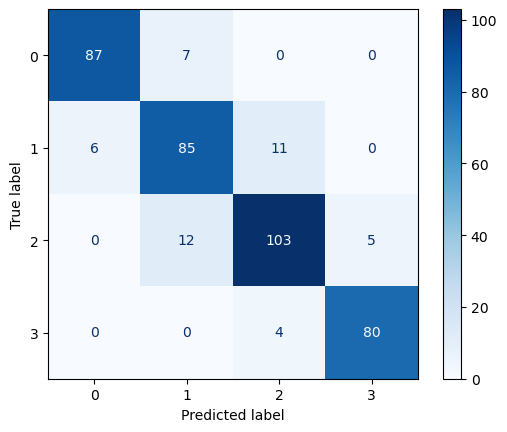

In [56]:
cm = confusion_matrix(y_test, y_Para_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

## ⚡ 7. XGBoost Classifier

## GradientBoostingClassifier

In [61]:
gb = GradientBoostingClassifier()

In [62]:
model = gb.fit(X_train,y_train)

In [63]:
y_pred = model.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        94
           1       0.85      0.87      0.86       102
           2       0.90      0.83      0.87       120
           3       0.89      0.94      0.91        84

    accuracy                           0.89       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.89      0.89      0.89       400



## XGBClassifier

In [65]:
xg = XGBClassifier()
xg_model = xg.fit(X_train,y_train)
y_pred= xg_model.predict(X_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        94
           1       0.86      0.89      0.88       102
           2       0.93      0.85      0.89       120
           3       0.89      0.96      0.93        84

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



In [71]:
para = {
    'n_estimators' :[150,200,300,400],
    'max_depth' : [10,20,30,50],
    'learning_rate': [0.1,0.01]
}

In [72]:
gs = GridSearchCV(xg,para,cv=5,n_jobs=-1)
gs_fit = gs.fit(X_train,y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,1.600575,0.132368,0.021053,0.003815,0.1,50,300,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.925000,0.909375,0.909375,0.875,0.909375,0.905625,0.016465,1
10,1.492429,0.053741,0.022582,0.007834,0.1,30,300,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",0.925000,0.909375,0.909375,0.875,0.909375,0.905625,0.016465,1
6,1.705566,0.260796,0.030277,0.009839,0.1,20,300,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.925000,0.912500,0.909375,0.875,0.903125,0.905000,0.016607,3
7,2.713415,0.252472,0.041805,0.003826,0.1,20,400,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.921875,0.912500,0.909375,0.875,0.906250,0.905000,0.015885,3
11,2.400535,0.254936,0.041520,0.001354,0.1,30,400,"{'learning_rate': 0.1, 'max_depth': 30, 'n_est...",0.921875,0.909375,0.909375,0.875,0.909375,0.905000,0.015762,3


In [73]:
xg = XGBClassifier(n_estimators=300,max_depth=50,learning_rate=0.1)
xg_model = xg.fit(X_train,y_train)
y_pred= xg_model.predict(X_test)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.88      0.90      0.89       102
           2       0.92      0.85      0.88       120
           3       0.90      0.95      0.92        84

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



## ✅ 8. Conclusion & Observations

## ✅ Conclusion

In this project, we built a classification model to predict mobile price ranges based on features such as RAM, battery power, internal memory, and more.

We tested multiple models including:
- **Random Forest**
- **Gradient Boosting**
- **XGBoost**

After tuning and evaluation, the **XGBoost Classifier** performed the best with:
- **Accuracy:** 91%
- **Macro F1 Score:** ~0.91

### 🔍 Key Observations:
- XGBoost handled imbalanced classes and feature interactions well.
- Feature scaling and SMOTE helped improve performance.
- Feature importance could be explored further to interpret the model better.

This model can provide a strong baseline for predicting price ranges in competitive mobile markets.
